# Plotting routine for the Jun22 Event - PSP

In [1]:
test = 'test'

In [39]:
%load_ext autoreload

%autoreload 2

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pickle as p

import datetime as datetime
from datetime import timedelta
import seaborn as sns
import pandas as pd
import os
#import copy as cp

import multiprocessing
import py3dcore_h4c as py3dcore_h4c

import py3dcore_h4c.fluxplot as fp

#plt.switch_backend('agg')


import warnings
warnings.filterwarnings('ignore')

import logging

logging.basicConfig(level=logging.INFO)
logging.getLogger("heliosat.spice").setLevel("WARNING")
logging.getLogger("heliosat.spacecraft").setLevel("WARNING")
#logging.getLogger("sunpy").setLevel("WARNING")
#logging.getLogger("py3dcore_h4c.fluxplot").setLevel("WARNING")

#print(sns.__version__)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


#### setting the times for py3DCORE_h4c

In [72]:
t_launch = datetime.datetime(2022, 6, 2, 7, 30, tzinfo=datetime.timezone.utc)

t_s = datetime.datetime(2022, 6, 2, 11, tzinfo=datetime.timezone.utc)
t_e = datetime.datetime(2022, 6, 2, 18, tzinfo=datetime.timezone.utc)

t_fit = [datetime.datetime(2022, 6, 2, 12, tzinfo=datetime.timezone.utc),
        datetime.datetime(2022, 6, 2, 13, tzinfo=datetime.timezone.utc),
        datetime.datetime(2022, 6, 2, 13, 30, tzinfo=datetime.timezone.utc),
        datetime.datetime(2022, 6, 2, 14, tzinfo=datetime.timezone.utc)]

#t_fit = fp.equal_t_creator(start = start, n = 4, delta = 6)

#####2022 Sep 5: 3 solar radii at 17 UT (COR2 & LASCO FoV appearance)
# 2022 Sep 5: 15 solar radii at 18:45 UT (PSP)

#### loading the pickle files

In [73]:
t_fit

[datetime.datetime(2022, 6, 2, 12, 0, tzinfo=datetime.timezone.utc),
 datetime.datetime(2022, 6, 2, 13, 0, tzinfo=datetime.timezone.utc),
 datetime.datetime(2022, 6, 2, 13, 30, tzinfo=datetime.timezone.utc),
 datetime.datetime(2022, 6, 2, 14, 0, tzinfo=datetime.timezone.utc)]

In [80]:
path = 'output/psp02062022_heeq_512_7/'

filepath = fp.loadpickle(path, number = -1)

In [81]:
filepath[:-7]

'output/psp02062022_heeq_512_7/06'

#### extracting parameters

In [82]:
res, allres, ind, meanparams = fp.get_params(filepath, give_mineps=True)

INFO:py3dcore_h4c.fluxplot:Retrieved the following parameters for the run with minimum epsilon:
INFO:py3dcore_h4c.fluxplot: --lon:  243.78
INFO:py3dcore_h4c.fluxplot: --lat:  -32.93
INFO:py3dcore_h4c.fluxplot: --inc:  29.09
INFO:py3dcore_h4c.fluxplot: --diameter 1 AU:  0.34
INFO:py3dcore_h4c.fluxplot: --aspect ratio:  3.68
INFO:py3dcore_h4c.fluxplot: --launch radius:  6.54
INFO:py3dcore_h4c.fluxplot: --launch speed:  936.63
INFO:py3dcore_h4c.fluxplot: --t factor:  229.98
INFO:py3dcore_h4c.fluxplot: --expansion rate:  1.14
INFO:py3dcore_h4c.fluxplot: --magnetic field decay rate:  1.64
INFO:py3dcore_h4c.fluxplot: --magnetic field 1 AU:  5.02
INFO:py3dcore_h4c.fluxplot: --drag coefficient:  1.39
INFO:py3dcore_h4c.fluxplot: --sw background speed:  1197.92


In [83]:
out = fp.get_ensemble_stats(filepath)

In [84]:
out.describe()

,lon,lat,inc,D1AU,delta,launch radius,launch speed,t factor,B1AU,gamma,vsw
count,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000
mean,253.262344,-47.897648,37.978622,0.311106,4.214600,7.947553,1036.129639,40.006805,5.369592,1.029378,815.343872
std,6.660427,7.925414,8.271620,0.028576,1.252922,1.464745,118.476555,138.348846,0.293402,0.465717,224.190979
min,234.700455,-59.924801,6.490479,0.193597,1.033091,3.014088,309.256592,-248.477386,5.002298,0.204913,303.919342
25%,248.522205,-54.180233,32.617173,0.295454,3.284429,7.014238,974.348740,-73.252008,5.145939,0.663895,642.044235
50%,253.546829,-49.370899,39.298847,0.315874,4.395084,8.201006,1055.565796,59.774324,5.293948,1.016862,834.829224
75%,257.897858,-43.488905,44.518159,0.333486,5.287915,9.153563,1123.551727,156.132065,5.516090,1.388955,1001.906708
max,269.730957,-14.802406,49.905685,0.349969,5.993769,9.970704,1199.856567,249.944138,6.546517,1.984182,1197.923706


#### loading and plotting the fitting results

INFO:py3dcore_h4c.fluxplot:No iparams_arr given, using parameters for run with minimum eps.
INFO:py3dcore_h4c.fitter.base:Using custom datafile: psp_2022jun.p


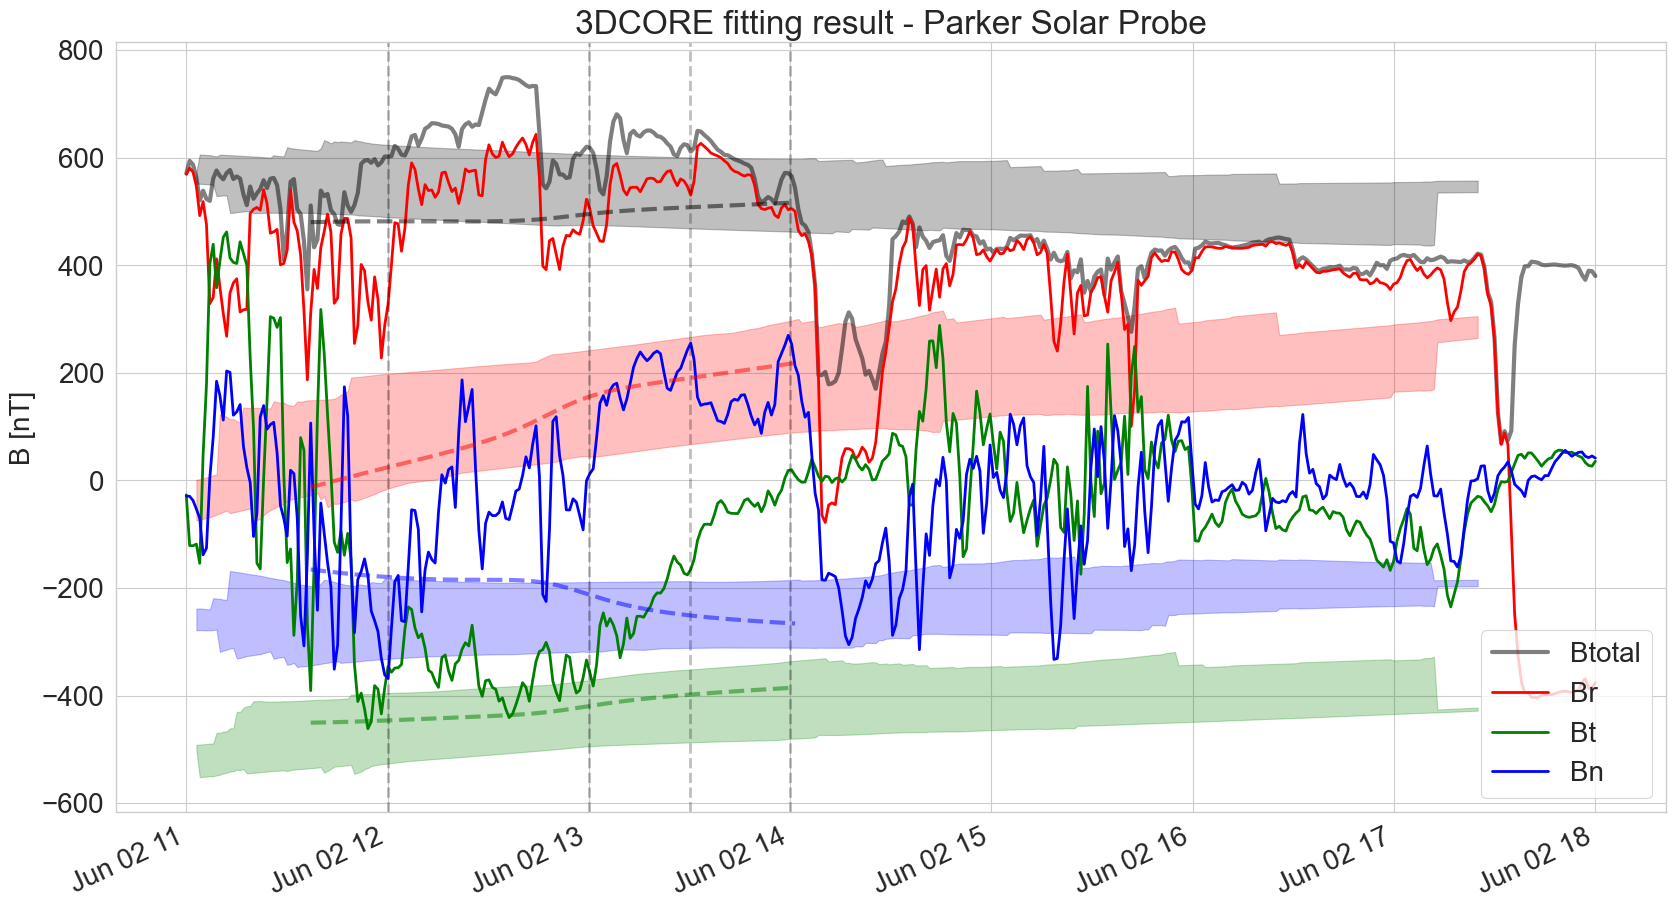

In [85]:
fp.fullinsitu(observer='PSP', t_fit=t_fit, start=t_s, end=t_e, filepath=filepath, 
              custom_data='psp_2022jun.p', best=True, ensemble=True, mean=False, save_fig=True, legend=True, fixed=None)

In [11]:
fp.scatterparams(filepath)

In [12]:
print(out['lon'].mean())
print(out['lon'].std())
print(out['launch radius'].std())
print(out['launch speed'].std())

172.78905
4.882709
0.53428584
266.25516


#### Plotting the fluxrope and spacecraft positions

In [9]:
#measurement times 
#tm0 =  t_launch + datetime.timedelta(days=1.5)
tm0 =  datetime.datetime(2022, 9, 7, 1)
tm1 =  t_launch + datetime.timedelta(days=1.7)
tm2 =  t_launch + datetime.timedelta(days=3.5)

fig = fp.full3d(spacecraftlist=['solo', 'psp'], planetlist =['Earth'],t = tm1, filepath = filepath)

INFO:sunpy:Obtained JPL HORIZONS location for Solar Orbiter (spacecraft) (-144


INFO: Obtained JPL HORIZONS location for Solar Orbiter (spacecraft) (-144 [sunpy.coordinates.ephemeris]


INFO:py3dcore_h4c.fluxplot:Indices of date: 59
INFO:py3dcore_h4c.fluxplot:Solar Orbiter - r: 0.684483, lon: 150.072220, lat: -3.730396, 
INFO:sunpy:Obtained JPL HORIZONS location for Solar Orbiter (spacecraft) (-144
INFO:py3dcore_h4c.fluxplot:Indices of date: 35
INFO:py3dcore_h4c.fluxplot:Solar Orbiter - r: 0.684483, lon: 150.072220, lat: -3.730396, 
INFO:sunpy:Obtained JPL HORIZONS location for Parker Solar Probe (spacecraft)


INFO: Obtained JPL HORIZONS location for Solar Orbiter (spacecraft) (-144 [sunpy.coordinates.ephemeris]
INFO: Obtained JPL HORIZONS location for Parker Solar Probe (spacecraft) [sunpy.coordinates.ephemeris]


INFO:py3dcore_h4c.fluxplot:Indices of date: 59
INFO:py3dcore_h4c.fluxplot:Parker Solar Probe - r: 0.095459, lon: -122.155481, lat: -2.099772, 
INFO:sunpy:Obtained JPL HORIZONS location for Parker Solar Probe (spacecraft)
INFO:py3dcore_h4c.fluxplot:Indices of date: 35
INFO:py3dcore_h4c.fluxplot:Parker Solar Probe - r: 0.095459, lon: -122.155481, lat: -2.099772, 


INFO: Obtained JPL HORIZONS location for Parker Solar Probe (spacecraft) [sunpy.coordinates.ephemeris]


### make fluxrope 3d movie

In [14]:
def make_frame(k):
    tm0 = datetime.datetime(2022, 9, 5, 19)
    t = tm0 + k*datetime.timedelta(hours=1)
    
    fig = fp.full3d(spacecraftlist=['solo', 'psp'], planetlist =['Earth'],
              t = t, filepath = filepath, save_fig = False)
    frmstr = '%05i' % (k) 
    plt.savefig(filepath[:-7] + 'movie_3d/'+frmstr+'.jpg',dpi=200)  
    return fig
    

In [15]:
inn=[i for i in range(100)]


mpool = multiprocessing.Pool(processes=5)
mpool.map(make_frame, inn[0:20])
mpool.close()
mpool.join()

print('done 1/4')

mpool = multiprocessing.Pool(processes=5)
mpool.map(make_frame, inn[20:40])
mpool.close()
mpool.join()

print('done 2/4')

mpool = multiprocessing.Pool(processes=5)
mpool.map(make_frame, inn[40:60])
mpool.close()
mpool.join()

print('done 3/4')

mpool = multiprocessing.Pool(processes=5)
mpool.map(make_frame, inn[40:80])
mpool.close()
mpool.join()

print('done 4/4')

done 1/4
done 2/4
done 3/4
done 4/4


In [16]:
os.system('ffmpeg -r 25 -i '+filepath[:-7]+'movie_3d/%05d.jpg -b 5000k -r 25 '+filepath[:-7]+'movie_3d/full_3d_movie.mp4 -y -loglevel quiet')

0

### plot fluxrope 3d multiview

In [17]:
#measurement times 
#tm0 =  t_launch + datetime.timedelta(days=1.5)
tm0 =  datetime.datetime(2022, 9, 7, 1)
tm1 =  t_launch + datetime.timedelta(days=1.7)
tm2 =  t_launch + datetime.timedelta(days=3.5)

fig = fp.full3d_multiview(t_launch = t_launch, filepath=filepath)

### make fluxrope 3d multiview movie

In [18]:
def make_frame2(k):
    tm0 = datetime.datetime(2022, 9, 5, 19)
    t = tm0 + k*datetime.timedelta(hours=1)
    frametime = k
    
    fig = fp.full3d_multiview_movie(t_launch = tm0, t = t, filepath=filepath,
                                    frametime=k)
    frmstr = '%05i' % (k) 
    plt.savefig(filepath[:-7] + 'movie_3d_multiview/'+frmstr+'.jpg',dpi=200)  
    return fig

In [19]:
inn=[i for i in range(100)]


mpool = multiprocessing.Pool(processes=5)
mpool.map(make_frame2, inn[0:20])
mpool.close()
mpool.join()

print('done 1/4')

mpool = multiprocessing.Pool(processes=5)
mpool.map(make_frame2, inn[20:40])
mpool.close()
mpool.join()

print('done 2/4')

mpool = multiprocessing.Pool(processes=5)
mpool.map(make_frame2, inn[40:60])
mpool.close()
mpool.join()

print('done 3/4')

mpool = multiprocessing.Pool(processes=5)
mpool.map(make_frame2, inn[40:80])
mpool.close()
mpool.join()

print('done 4/4')

The history saving thread hit an unexpected error (OperationalError('disk I/O error')).History will not be written to the database.
done 1/4
done 2/4
done 3/4
done 4/4


In [20]:
os.system('ffmpeg -r 25 -i '+filepath[:-7]+'movie_3d_multiview/%05d.jpg -b 5000k -r 25 '+filepath[:-7]+'movie_3d/full_3d_multiview_movie.mp4 -y -loglevel quiet')

0

# Used for Debug

In [21]:
TP_A =  t_launch + datetime.timedelta(hours=2)
TP_B =  t_launch + datetime.timedelta(hours=40)


C_A = "xkcd:red"
C_B = "xkcd:blue"
    
sns.set_style('whitegrid')

fig = plt.figure(figsize=(15, 11),dpi=100)

ax1 = plt.subplot2grid((2, 3), (0, 0),rowspan=2,colspan=2,projection='3d')  
ax2 = plt.subplot2grid((2, 3), (0, 2),projection='3d')  
ax3 = plt.subplot2grid((2, 3), (1, 2),projection='3d')  

model_obj = fp.returnmodel(filepath)


fp.plot_configure(ax1, view_azim=150, view_elev=25, view_radius=.2,light_source=True) #view_radius=.08

fp.plot_3dcore(ax1, model_obj, TP_A, color=C_A,light_source = True)
fp.plot_3dcore(ax1, model_obj, TP_B, color=C_B,light_source = True)

fp.plot_shift(ax1,0.31,-0.25,0.0,-0.2)


fp.plot_configure(ax2, view_azim=165-90, view_elev=90, view_radius=.08,light_source=True)
    
fp.plot_3dcore(ax2, model_obj, TP_A, color=C_A,light_source = True)
fp.plot_3dcore(ax2, model_obj, TP_B, color=C_B,light_source = True)

fp.plot_shift(ax2,0.26,-0.41,0.08,0.0)



fp.plot_configure(ax3, view_azim=65, view_elev=-5, view_radius=.01,light_source=True)
    
fp.plot_3dcore(ax3, model_obj, TP_A, color=C_A,light_source = True)
fp.plot_3dcore(ax3, model_obj, TP_B, color=C_B,light_source = True)

fp.plot_shift(ax3,0.26,-0.41,0.08,0.0)

